# Analyzing the output of the HRTEM simulation #

## A NOTE BEFORE STARTING ##

Since the ``prismatique`` git repository tracks this notebook under its original
basename ``analyzing_hrtem_sim_output.ipynb``, we recommend that you copy the
original notebook and rename it to any other basename that is not one of the
original basenames that appear in the ``<root>/examples`` directory before
executing any of the notebook cells below, where ``<root>`` is the root of the
``prismatique`` repository. This way you can explore the notebook by executing
and modifying cells without changing the original notebook, which is being
tracked by git.

## Table of contents ##

- [Import necessary modules](#Import-necessary-modules)
- [Introduction](#Introduction)
- [Set paths to files storing output](#Set-paths-to-files-storing-output)
- [Load HRTEM simulation parameter set and represent it as Python object](#Load-HRTEM-simulation-parameter-set-and-represent-it-as-Python-object)
- [Extracting experiment properties](#Extracting-experiment-properties)
  - [Extract the number of frozen phonon configurations in each subset](#Extract-the-number-of-frozen-phonon-configurations-in-each-subset)
  - [Extract the beam defocii](#Extract-the-beam-defocii)
  - [Extract the beam tilts](#Extract-the-beam-tilts)
  - [Extract $x$-coordinates of HRTEM images](#Extract-x-coordinates-of-HRTEM-images)
  - [Extract $y$-coordinates of HRTEM images](#Extract-y-coordinates-of-HRTEM-images)
- [Loading HRTEM image wavefunctions](#Loading-HRTEM-image-wavefunctions)
- [Loading HRTEM intensity images](#Loading-HRTEM-intensity-images)

## Import necessary modules ##

In [1]:
# For general array handling.
import numpy as np

# For setting various visualization parameters, and closing figures.
import matplotlib.pyplot as plt



# The library that is the subject of this demonstration. Users may receive a
# warning message about ``pyopencl`` upon importing ``prismatique``. This
# message can be safely ignored.
import prismatique

## Introduction ##

In this notebook, we demonstrate how one can analyze the output generated by the
script ``<root>/examples/hrtem_sim/run.py``. Said script generates the output of
the HRTEM simulation involving the bilayer $\mathrm{MoS}_2$ sample that we
defined
[here](https://mrfitzpa.github.io/prismatique/examples/atomic_coord_generator/generate.html).
For the current notebook to work properly, one must first run the aforementioned
script.

In order to execute the cells in this notebook as intended, a set of Python
libraries need to be installed in the Python environment within which the cells
of the notebook are to be executed. For this particular notebook, users need to
install:

    pyprismatic>=2.0
    jupyter
    ipympl
    prismatique

The easiest way to install these libraries is within a `conda` virtual
environment. It is recommended that `pyprismatic` be installed separately,
prior to installing any of the other Python libraries listed above. GPU
acceleration is available for `pyprismatic` (and thus `prismatique`) if the
following conditions are met:

1. You are using a Linux or Windows machine that has NVIDIA GPUs.
2. A NVIDIA driver is installed with CUDA version 10.2.89 or greater.

If the above conditions have been met, and you would like to be able to use GPUs
with `prismatique`, run the following command:

    conda install -c conda-forge pyprismatic=2.*=gpu* cudatoolkit==<X>.<Y>.*

where `<X>` and `<Y>` are the major and minor versions of CUDA installed on
your machine, e.g. CUDA version 10.2.89 has a major version of `10`, and a
minor version of `2`. Users can omit `cudatoolkit==<X>.<Y>.*` if they do not
require a specific version of `cudatoolkit`, which should apply to most
scenarios. For CPU support only, run the following command instead:

    conda install -c conda-forge pyprismatic=2.*=cpu*

Once `pyprismatic` is installed, you can install the remaining libraries via
`pip` by running the following command:

    pip install prismatique[examples]

or alternatively, via `conda` by running the following command:

    conda install -c conda-forge prismatique ipympl jupyter

You can find the documentation for the `prismatique` library
[here](https://mrfitzpa.github.io/prismatique/_autosummary/prismatique.html). It
is recommended that you consult the documentation of this library as you explore
the notebook. Moreover, users should execute the cells in the order that they
appear, i.e. from top to bottom, as some cells reference variables that are set
in other cells above them. **Users should make sure to navigate the
documentation for the version of `prismatique` that they are currently using.**

## Set paths to files storing output ##

In [2]:
# Path to file storing the complex-valued wavefunction data of the frozen phonon
# configuration subset #0.
path_to_hrtem_sim_wavefunction_output_subset_0 = \
    "../data/hrtem_sim_output/hrtem_sim_wavefunction_output_of_subset_0.h5"

# Path to file storing the complex-valued wavefunction data of the frozen phonon
# configuration subset #1.
path_to_hrtem_sim_wavefunction_output_subset_1 = \
    "../data/hrtem_sim_output/hrtem_sim_wavefunction_output_of_subset_1.h5"

# Path to file storing the HRTEM intensity data.
path_to_hrtem_sim_intensity_output = \
    "../data/hrtem_sim_output/hrtem_sim_intensity_output.h5"

# Path to file storing the serialized representation of the parameter set for
# the HRTEM simulation.
path_to_hrtem_sim_params = \
    "../data/hrtem_sim_output/hrtem_sim_params.json"

## Load HRTEM simulation parameter set and represent it as Python object ##

In [3]:
# Load serialized representation of the parameter set for the HRTEM simulation
# and represent it as a Python object.
hrtem_sim_params = prismatique.hrtem.sim.Params.load(path_to_hrtem_sim_params)

See the notebook ``<root>/examples/analyzing_sim_params.ipynb`` for a
demonstration of using the Python representation of the HRTEM simulation
parameters, ``hrtem_sim_params``, to extract various properties of the HRTEM
experiment being modelled. Below we show alternative ways to extract certain
properties of the HRTEM experiment using the HRTEM simulation output files
storing the wavefunction and intensity data.

## Extracting experiment properties ##

### Extract the number of frozen phonon configurations in each subset ###

In [4]:
func_alias = prismatique.load.num_frozen_phonon_configs_in_subset
filenames = (path_to_hrtem_sim_wavefunction_output_subset_0, 
             path_to_hrtem_sim_wavefunction_output_subset_1)

for subset_idx, filename in enumerate(filenames):
    num_frozen_phonon_configs_in_subset = func_alias(filename)
    
    unformatted_msg = "# frozen phonon configurations in subset {}: {}"
    msg = unformatted_msg.format(subset_idx, 
                                 num_frozen_phonon_configs_in_subset)
    print(msg)

# frozen phonon configurations in subset 0: 5
# frozen phonon configurations in subset 1: 5


### Extract the beam defocii ###

Note that upon running a simulation according to a given HRTEM simulation
parameter set, ``prismatique`` would simulate a series of temporally coherent
HRTEM experiments, where each simulated experiment would use a different beam
defocus from the set of defocii specified in said simulation parameter set.

In [5]:
# From the output file storing the complex-valued wavefunction data of the
# frozen phonon configuration subset #0.
filename = path_to_hrtem_sim_wavefunction_output_subset_0
defocii = prismatique.load.defocii(filename)

unformatted_msg = "defocii (in Å): {}"
msg = unformatted_msg.format(defocii)
print(msg)

defocii (in Å): (-8156.921875, -4000.0, 156.92193603515625)


In [6]:
# From the output file storing the complex-valued wavefunction data of the
# frozen phonon configuration subset #1.
filename = path_to_hrtem_sim_wavefunction_output_subset_1
defocii = prismatique.load.defocii(filename)

unformatted_msg = "defocii (in Å): {}"
msg = unformatted_msg.format(defocii)
print(msg)

defocii (in Å): (-8156.921875, -4000.0, 156.92193603515625)


### Extract the beam tilts ###

In [7]:
# From the output file storing the complex-valued wavefunction data of the
# frozen phonon configuration subset #0.
filename = path_to_hrtem_sim_wavefunction_output_subset_0
beam_tilts = prismatique.load.hrtem_beam_tilts(filename)

msg = "beam tilts (in mrads):"
print(msg)
print(np.array(beam_tilts))

beam tilts (in mrads):
[[-7.7643976 -3.92243  ]
 [-7.7643976  0.       ]
 [-7.7643976  3.92243  ]
 [-3.8821988 -7.84486  ]
 [-3.8821988 -3.92243  ]
 [-3.8821988  0.       ]
 [-3.8821988  3.92243  ]
 [-3.8821988  7.84486  ]
 [ 0.        -7.84486  ]
 [ 0.        -3.92243  ]
 [ 0.         0.       ]
 [ 0.         3.92243  ]
 [ 0.         7.84486  ]
 [ 3.8821988 -7.84486  ]
 [ 3.8821988 -3.92243  ]
 [ 3.8821988  0.       ]
 [ 3.8821988  3.92243  ]
 [ 3.8821988  7.84486  ]
 [ 7.7643976 -3.92243  ]
 [ 7.7643976  0.       ]
 [ 7.7643976  3.92243  ]]


In [8]:
# From the output file storing the complex-valued wavefunction data of the
# frozen phonon configuration subset #1.
filename = path_to_hrtem_sim_wavefunction_output_subset_1
beam_tilts = prismatique.load.hrtem_beam_tilts(filename)

msg = "beam tilts (in mrads):"
print(msg)
print(np.array(beam_tilts))

beam tilts (in mrads):
[[-7.7643976 -3.92243  ]
 [-7.7643976  0.       ]
 [-7.7643976  3.92243  ]
 [-3.8821988 -7.84486  ]
 [-3.8821988 -3.92243  ]
 [-3.8821988  0.       ]
 [-3.8821988  3.92243  ]
 [-3.8821988  7.84486  ]
 [ 0.        -7.84486  ]
 [ 0.        -3.92243  ]
 [ 0.         0.       ]
 [ 0.         3.92243  ]
 [ 0.         7.84486  ]
 [ 3.8821988 -7.84486  ]
 [ 3.8821988 -3.92243  ]
 [ 3.8821988  0.       ]
 [ 3.8821988  3.92243  ]
 [ 3.8821988  7.84486  ]
 [ 7.7643976 -3.92243  ]
 [ 7.7643976  0.       ]
 [ 7.7643976  3.92243  ]]


### Extract $x$-coordinates of HRTEM images ###

In [9]:
# From the output file storing the complex-valued wavefunction data of the
# frozen phonon configuration subset #0. Note that the coordinates are for
# unprocessed HRTEM images.
filename = path_to_hrtem_sim_wavefunction_output_subset_0
r_x = prismatique.load.hrtem_image_x_coords(filename)

unformatted_msg = "r_x (in Å): {}"
msg = unformatted_msg.format(r_x)
print(msg)

r_x (in Å): (-10.888566017150879, -10.54289722442627, -10.19722843170166, -9.85155963897705, -9.505890846252441, -9.160222053527832, -8.814553260803223, -8.468884468078613, -8.123215675354004, -7.7775468826293945, -7.431878089904785, -7.086209297180176, -6.740540504455566, -6.394871711730957, -6.049202919006348, -5.7035346031188965, -5.357865810394287, -5.012197017669678, -4.666528224945068, -4.320859432220459, -3.9751906394958496, -3.6295218467712402, -3.283853054046631, -2.9381842613220215, -2.592515707015991, -2.246846914291382, -1.9011781215667725, -1.555509328842163, -1.2098406553268433, -0.8641718626022339, -0.5185031294822693, -0.1728343814611435, 0.1728343814611435, 0.5185031294822693, 0.8641718626022339, 1.2098406553268433, 1.555509328842163, 1.9011781215667725, 2.246846914291382, 2.592515707015991, 2.9381842613220215, 3.283853054046631, 3.6295218467712402, 3.9751906394958496, 4.320859432220459, 4.666528224945068, 5.012197017669678, 5.357865810394287, 5.7035346031188965, 6.049

In [10]:
# From the output file storing the complex-valued wavefunction data of the
# frozen phonon configuration subset #1. Note that the coordinates are for
# unprocessed HRTEM images.
filename = path_to_hrtem_sim_wavefunction_output_subset_1
r_x = prismatique.load.hrtem_image_x_coords(filename)

unformatted_msg = "r_x (in Å): {}"
msg = unformatted_msg.format(r_x)
print(msg)

r_x (in Å): (-10.888566017150879, -10.54289722442627, -10.19722843170166, -9.85155963897705, -9.505890846252441, -9.160222053527832, -8.814553260803223, -8.468884468078613, -8.123215675354004, -7.7775468826293945, -7.431878089904785, -7.086209297180176, -6.740540504455566, -6.394871711730957, -6.049202919006348, -5.7035346031188965, -5.357865810394287, -5.012197017669678, -4.666528224945068, -4.320859432220459, -3.9751906394958496, -3.6295218467712402, -3.283853054046631, -2.9381842613220215, -2.592515707015991, -2.246846914291382, -1.9011781215667725, -1.555509328842163, -1.2098406553268433, -0.8641718626022339, -0.5185031294822693, -0.1728343814611435, 0.1728343814611435, 0.5185031294822693, 0.8641718626022339, 1.2098406553268433, 1.555509328842163, 1.9011781215667725, 2.246846914291382, 2.592515707015991, 2.9381842613220215, 3.283853054046631, 3.6295218467712402, 3.9751906394958496, 4.320859432220459, 4.666528224945068, 5.012197017669678, 5.357865810394287, 5.7035346031188965, 6.049

In [11]:
# From the output file storing the HRTEM intensity data. Note that the
# coordinates are for postprocessed HRTEM images.
filename = path_to_hrtem_sim_intensity_output
r_x = prismatique.load.hrtem_image_x_coords(filename)

unformatted_msg = "r_x (in Å): {}"
msg = unformatted_msg.format(r_x)
print(msg)

r_x (in Å): (-5.357865810394287, -5.012197017669678, -4.666528224945068, -4.320859432220459, -3.9751906394958496, -3.6295218467712402, -3.283853054046631, -2.9381842613220215, -2.592515707015991, -2.246846914291382, -1.9011781215667725, -1.555509328842163, -1.2098406553268433, -0.8641718626022339, -0.5185031294822693, -0.1728343814611435, 0.1728343814611435, 0.5185031294822693, 0.8641718626022339, 1.2098406553268433, 1.555509328842163, 1.9011781215667725, 2.246846914291382, 2.592515707015991, 2.9381842613220215, 3.283853054046631, 3.6295218467712402, 3.9751906394958496, 4.320859432220459, 4.666528224945068, 5.012197017669678, 5.357865810394287)


### Extract $y$-coordinates of HRTEM images ###

In [12]:
# From the output file storing the complex-valued wavefunction data of the
# frozen phonon configuration subset #0. Note that the coordinates are for
# unprocessed HRTEM images.
filename = path_to_hrtem_sim_wavefunction_output_subset_0
r_y = prismatique.load.hrtem_image_y_coords(filename)

unformatted_msg = "r_y (in Å): {}"
msg = unformatted_msg.format(r_y)
print(msg)

r_y (in Å): (10.776885032653809, 10.434762001037598, 10.09263801574707, 9.75051498413086, 9.408391952514648, 9.066267967224121, 8.72414493560791, 8.3820219039917, 8.039897918701172, 7.697774887084961, 7.35565185546875, 7.013528347015381, 6.671404838562012, 6.329281806945801, 5.987158298492432, 5.645035266876221, 5.302911758422852, 4.960788249969482, 4.6186652183532715, 4.276541709899902, 3.9344184398651123, 3.592294931411743, 3.250171661376953, 2.908048391342163, 2.565925121307373, 2.223801612854004, 1.8816783428192139, 1.5395549535751343, 1.1974316835403442, 0.8553083539009094, 0.5131850242614746, 0.1710616648197174, -0.1710616648197174, -0.5131850242614746, -0.8553083539009094, -1.1974316835403442, -1.5395549535751343, -1.8816783428192139, -2.223801612854004, -2.565925121307373, -2.908048391342163, -3.250171661376953, -3.592294931411743, -3.9344184398651123, -4.276541709899902, -4.6186652183532715, -4.960788249969482, -5.302911758422852, -5.645035266876221, -5.987158298492432, -6.329

In [13]:
# From the output file storing the complex-valued wavefunction data of the
# frozen phonon configuration subset #1. Note that the coordinates are for
# unprocessed HRTEM images.
filename = path_to_hrtem_sim_wavefunction_output_subset_1
r_y = prismatique.load.hrtem_image_y_coords(filename)

unformatted_msg = "r_y (in Å): {}"
msg = unformatted_msg.format(r_y)
print(msg)

r_y (in Å): (10.776885032653809, 10.434762001037598, 10.09263801574707, 9.75051498413086, 9.408391952514648, 9.066267967224121, 8.72414493560791, 8.3820219039917, 8.039897918701172, 7.697774887084961, 7.35565185546875, 7.013528347015381, 6.671404838562012, 6.329281806945801, 5.987158298492432, 5.645035266876221, 5.302911758422852, 4.960788249969482, 4.6186652183532715, 4.276541709899902, 3.9344184398651123, 3.592294931411743, 3.250171661376953, 2.908048391342163, 2.565925121307373, 2.223801612854004, 1.8816783428192139, 1.5395549535751343, 1.1974316835403442, 0.8553083539009094, 0.5131850242614746, 0.1710616648197174, -0.1710616648197174, -0.5131850242614746, -0.8553083539009094, -1.1974316835403442, -1.5395549535751343, -1.8816783428192139, -2.223801612854004, -2.565925121307373, -2.908048391342163, -3.250171661376953, -3.592294931411743, -3.9344184398651123, -4.276541709899902, -4.6186652183532715, -4.960788249969482, -5.302911758422852, -5.645035266876221, -5.987158298492432, -6.329

In [14]:
# From the output file storing the HRTEM intensity data. Note that the
# coordinates are for postprocessed HRTEM images.
filename = path_to_hrtem_sim_intensity_output
r_y = prismatique.load.hrtem_image_y_coords(filename)

unformatted_msg = "r_y (in Å): {}"
msg = unformatted_msg.format(r_y)
print(msg)

r_y (in Å): (5.302911758422852, 4.960788249969482, 4.6186652183532715, 4.276541709899902, 3.9344184398651123, 3.592294931411743, 3.250171661376953, 2.908048391342163, 2.565925121307373, 2.223801612854004, 1.8816783428192139, 1.5395549535751343, 1.1974316835403442, 0.8553083539009094, 0.5131850242614746, 0.1710616648197174, -0.1710616648197174, -0.5131850242614746, -0.8553083539009094, -1.1974316835403442, -1.5395549535751343, -1.8816783428192139, -2.223801612854004, -2.565925121307373, -2.908048391342163, -3.250171661376953, -3.592294931411743, -3.9344184398651123, -4.276541709899902, -4.6186652183532715, -4.960788249969482, -5.302911758422852)


## Loading HRTEM image wavefunctions ##

In the code blocks below, we load a subcollection of the HRTEM image
wavefunctions of one subset.

Load a HRTEM image wavefunction subcollection into a ``hyperspy`` signal.

In [15]:
kwargs = {"filename": path_to_hrtem_sim_wavefunction_output_subset_0, 
          "multi_dim_slice": ([1, 4], 
                              slice(None), 
                              slice(None))}

hrtem_image_wavefunction_signal, navigational_to_original_indices_map = \
    prismatique.load.hrtem_image_wavefunctions(**kwargs)

``navigational_to_original_indices_map`` is a dictionary that maps the
navigational indices of the hyperspy signal ``hrtem_image_wavefunction_signal``
to the original indices specified by ``multi_dim_slice``. For example, if the
original atomic configuration indices map to a set of corresponding navigational
indices, then
``navigational_to_original_indices_map["atomic_config_indices"][i]`` yields the
atomic configuration index specified in the expression
``single_dim_slice=multi_dim_slice[0] if multi_dim_slice is not None else
slice(None)`` that corresponds to the ``i`` th atomic configuration index in the
nagivation index space of ``hrtem_image_wavefunction_signal``, where ``i`` is a
nonnegative integer smaller than the total number of atomic configuration
indices specified in ``single_dim_slice``.

In [16]:
navigational_to_original_indices_map

{'atomic_config_indices': (1, 4),
 'defocus_indices': (0, 1, 2),
 'tilt_indices': (0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20)}

Show the HRTEM image wavefunction signal metadata.

In [17]:
hrtem_image_wavefunction_signal.metadata

├── General
│   └── title = HRTEM Image Wavefunction
├── Prismatique
└── Signal
    ├── pixel value units = dimensionless
    └── signal_type =

Plot the HRTEM image wavefunction subcollection.

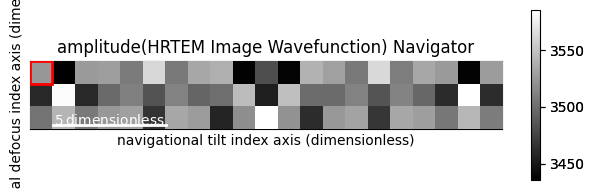

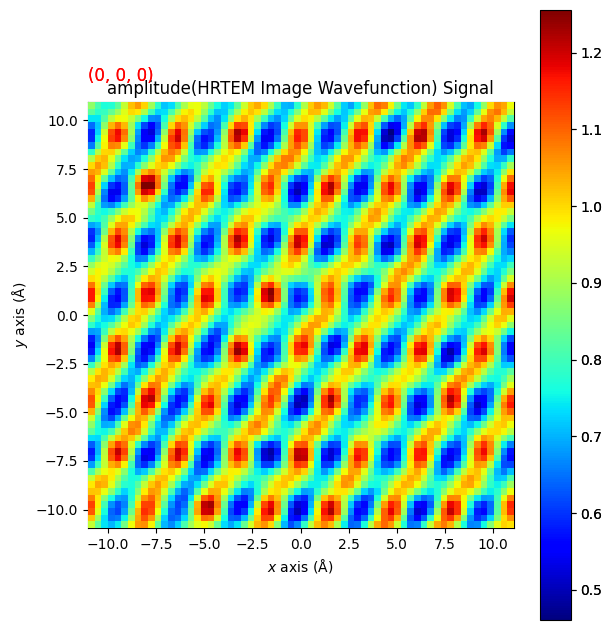

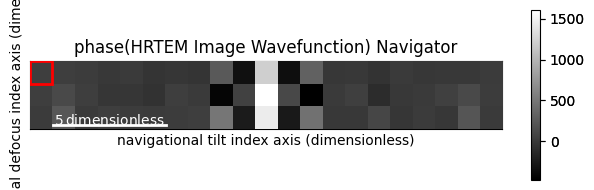

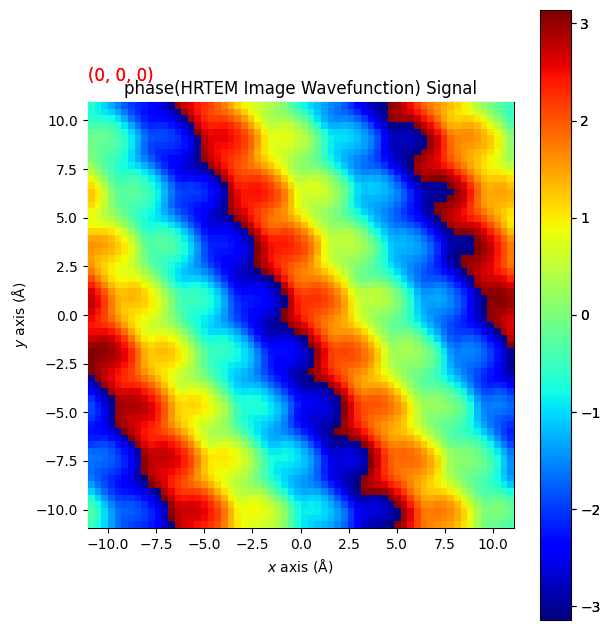

In [18]:
%matplotlib ipympl

kwargs = {"colorbar": True,
          "scalebar": True,
          "axes_ticks": True,
          "gamma": 1,
          "cmap": plt.get_cmap("jet")}
hrtem_image_wavefunction_signal.plot(representation="polar", **kwargs)

## Loading HRTEM intensity images ##

Load a HRTEM intensity image subcollection into a ``hyperspy`` signal.

In [19]:
kwargs = {"filename": path_to_hrtem_sim_intensity_output}

hrtem_intensity_image_signal = \
    prismatique.load.hrtem_intensity_image(**kwargs)

Show the HRTEM intensity image signal metadata.

In [20]:
hrtem_intensity_image_signal.metadata

├── General
│   └── title = HRTEM Intensity Image
├── Prismatique
└── Signal
    ├── pixel value units = dimensionless
    └── signal_type =

Plot the HRTEM intensity image subcollection.

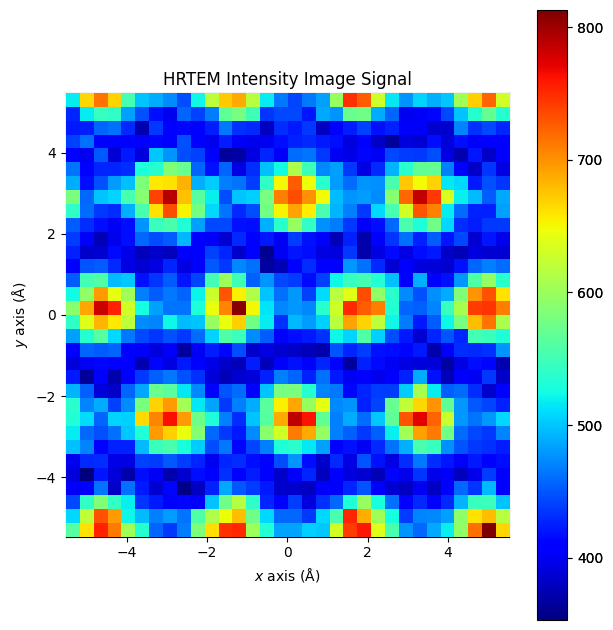

In [21]:
%matplotlib inline

plt.close("all")  # Close all previous figures to release memory.

kwargs = {"colorbar": True,
          "scalebar": True,
          "axes_ticks": True,
          "gamma": 1,
          "cmap": plt.get_cmap("jet")}
hrtem_intensity_image_signal.plot(**kwargs)